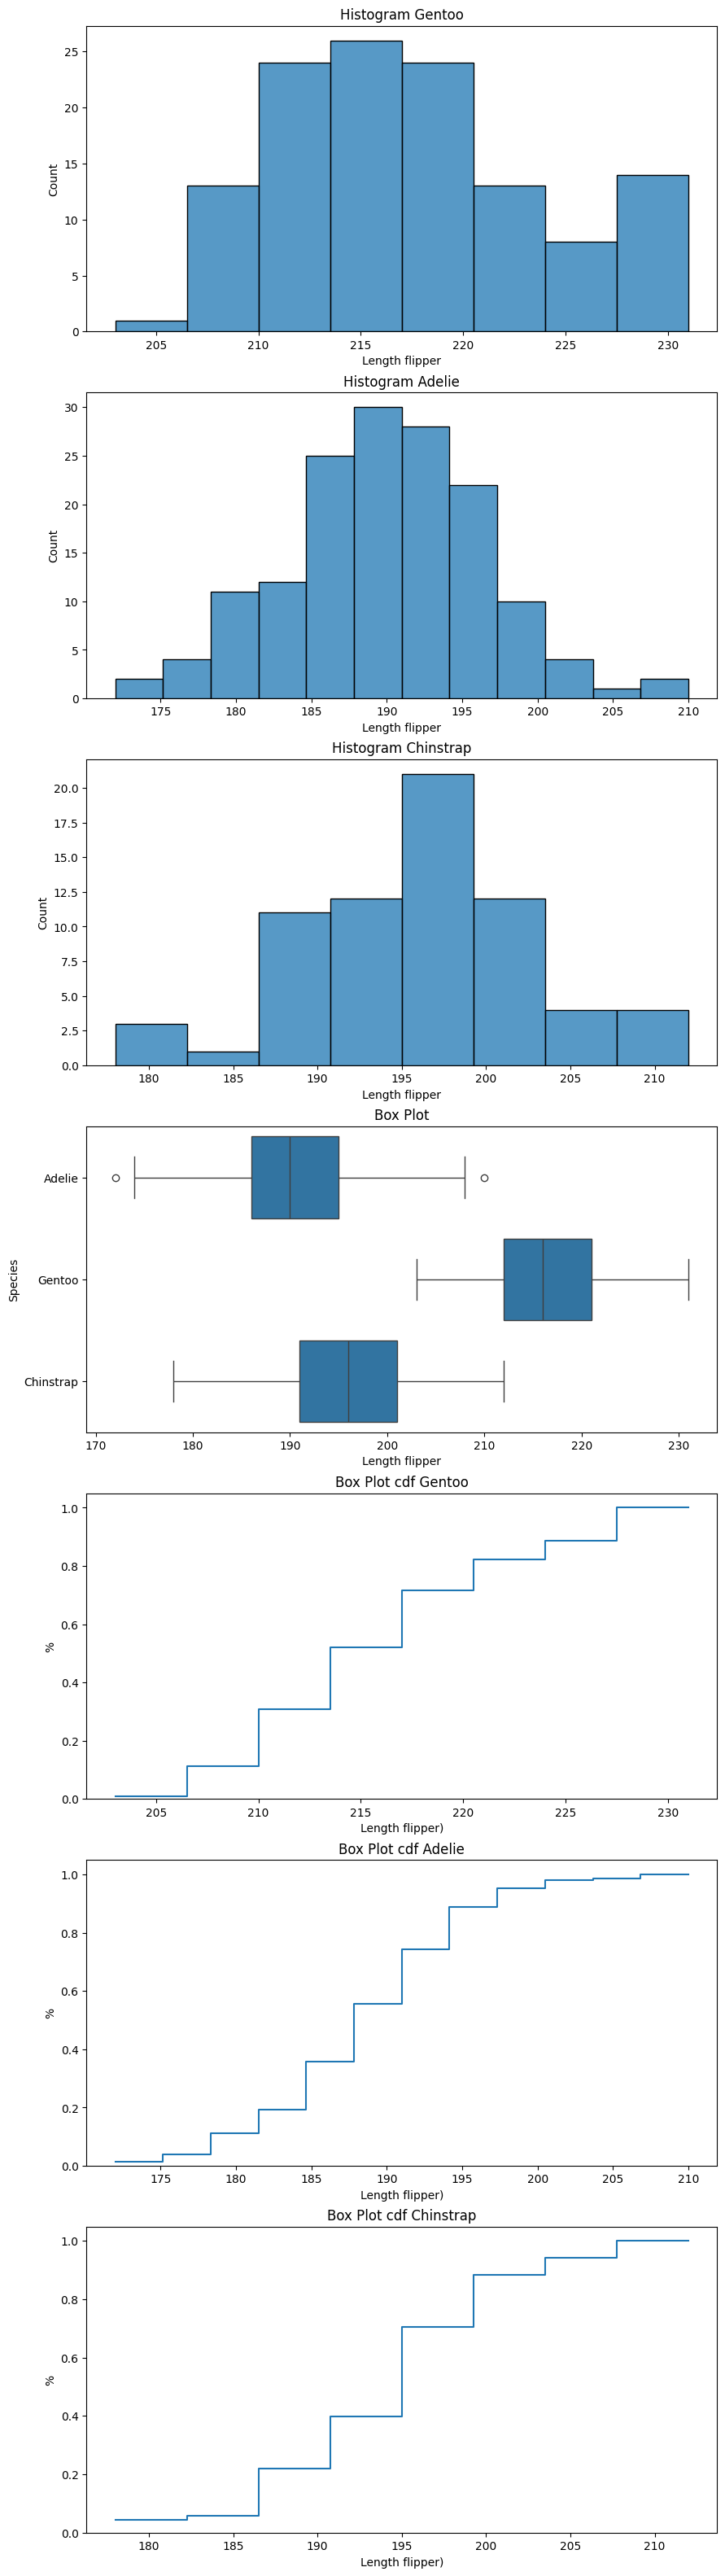

In [ ]:

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns


input_file = "penguins.csv"
missing_file = "missing.csv"
M = "NA"

df = pl.read_csv(input_file, null_values=[M])
fig, axes = plt.subplots(7, 1, figsize=(10, 40))  

gentoo_df = df.filter(pl.col('species') == 'Gentoo')
sns.histplot(ax=axes[0], data=gentoo_df.to_pandas(), x="flipper_length_mm")
axes[0].set_title('Histogram Gentoo')
axes[0].set_xlabel('Length flipper')
axes[0].set_ylabel('Count')


adelie_df = df.filter(pl.col('species') == 'Adelie')
sns.histplot(ax=axes[1], data=adelie_df.to_pandas(), x="flipper_length_mm")
axes[1].set_title('Histogram Adelie')
axes[1].set_xlabel('Length flipper')
axes[1].set_ylabel('Count')

chinstrap_df = df.filter(pl.col('species') == 'Chinstrap')
sns.histplot(ax=axes[2], data=chinstrap_df.to_pandas(), x="flipper_length_mm")
axes[2].set_title('Histogram Chinstrap')
axes[2].set_xlabel('Length flipper')
axes[2].set_ylabel('Count')


sns.boxplot(ax=axes[3], x="flipper_length_mm", y="species", data=df)
axes[3].set_title('Box Plot')
axes[3].set_xlabel('Length flipper')
axes[3].set_ylabel('Species')


sns.histplot(
ax=axes[4],
data=gentoo_df, x="flipper_length_mm", 
element="step", 
fill=False,
cumulative=True, 
stat="density", 

)
axes[4].set_title('Box Plot cdf Gentoo')
axes[4].set_xlabel('Length flipper)')
axes[4].set_ylabel('%')

sns.histplot(
ax=axes[5],
data=adelie_df, x="flipper_length_mm", 
element="step", 
fill=False,
cumulative=True, 
stat="density", 

)
axes[5].set_title('Box Plot cdf Adelie')
axes[5].set_xlabel('Length flipper)')
axes[5].set_ylabel('%')


sns.histplot(
ax=axes[6],
data=chinstrap_df, x="flipper_length_mm", 
element="step", 
fill=False,
cumulative=True, 
stat="density", 

)
axes[6].set_title('Box Plot cdf Chinstrap')
axes[6].set_xlabel('Length flipper)')
axes[6].set_ylabel('%')


df_with_missing = df.filter(pl.any_horizontal(pl.all().is_null()))
df_with_missing.write_csv(missing_file)

